In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


# Load the  clean Data

In [2]:
telcom_data = pd.read_csv('tel_data.csv')
telcom_data.head(10)

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5  1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
6  1.311448e+19   4/13/2019 8:41     612.0   4/25/2019 8:16   168.0   
7  1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
8  1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
9  1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI    Last Location Name  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13      9164566995485190   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13               L77566A   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13               D42335A   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13               T21824A   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13               D88865A   
5  1074638.0  2.082014e+14   3.366819e+10  3.529841e+13               T89132C   
6  1035261.0  2.082014e+14   3.366537e+10  8.676270e+13      9164567010589190   
7   951292.0  2.082010e+14   3.376349e+10  8.654640e+13  CELL_208_20_520025_1   
8   941634.0  2.082014e+14   3.369874e+10  3.556241e+13               T42084A   
9   864482.0  2.082003e+14   3.365922e+10  3.557311e+13               L20434C   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0        42.000000         5.000000                     23.0   
1        65.000000         5.000000                     16.0   
2       109.795706        17.662883                      6.0   
3       109.795706        17.662883                     44.0   
4       109.795706        17.662883                      6.0   
5       109.795706        17.662883                     70.0   
6       102.000000         5.000000                     22.0   
7        39.000000        18.000000                   3698.0   
8       109.795706        17.662883                     46.0   
9        97.000000         7.000000                   3845.0   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0                     44.0                 2.080991e+07   
1                     26.0                 2.080991e+07   
2                      9.0                 2.080991e+07   
3                     44.0                 2.080991e+07   
4                      9.0                 2.080991e+07   
5                     54.0                 2.080991e+07   
6                     38.0                 2.080991e+07   
7                    416.0                 1.952000e+04   
8                     49.0                 2.080991e+07   
9                   2535.0                 3.231397e+06   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
0                759658.664811                100.0   
1                759658.664811                100.0   
2                759658.664811                100.0   
3                759658.664811                100.0   
4                759658.664811                100.0   
5                759658.664811                100.0   
6                759658.664811                100.0   
7                759658.664811                 99.0   
8                759658.664811                100.0   
9                  7230.000000                 70.0   

   50 Kbps < DL TP < 250 Kbps (%)  250 Kbps < DL TP < 1 Mbps (%)  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0

In [5]:
telcom_data.isna().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

# Task 1.2

#### Describe all relevant variables and associated data types

In [13]:
#  Display information about the dataset, including data types
print(telcom_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

#### Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.


** Analyzing basic metrics(mean,median,Range,Variance) is fundamental for understanding the central tendency, variability, and overall distribution of data 


Understanding these basic metrics is crucial for the global objective in the following ways:

Performance Monitoring: Mean and median values of key metrics can serve as benchmarks for performance monitoring. Deviations from these benchmarks might signal areas that need attention.

Identifying Anomalies: Range, variance, and standard deviation are useful for identifying outliers or anomalies in the dataset. Unusual values may indicate errors, fraud, or exceptional events that need investigation.

Decision-Making: These metrics provide a foundation for informed decision-making. For example, if the mean revenue is decreasing over time, it may prompt a review of marketing strategies or customer retention efforts.

Data Quality Assurance: Analyzing basic metrics is part of data quality assurance. Inconsistencies or unexpected patterns in these metrics may indicate issues with data collection, processing, or integrity.

#### Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation. 

In [14]:
# Identify quantitative variables in the dataset
quantitative_variables = telcom_data.select_dtypes(include=['int64', 'float64']).columns

# Loop through each quantitative variable and compute dispersion parameters
for variable in quantitative_variables:
    mean_value = telcom_data[variable].mean()
    median_value = telcom_data[variable].median()
    range_value = telcom_data[variable].max() - telcom_data[variable].min()
    variance_value = telcom_data[variable].var()
    std_dev_value = telcom_data[variable].std()

    # Display the results
    print(f"\nAnalysis for {variable}:")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Range: {range_value}")
    print(f"Variance: {variance_value}")
    print(f"Standard Deviation: {std_dev_value}")


Analysis for Bearer Id:
Mean: 1.013887465425634e+19
Median: 7.3498832641961e+18
Range: 6.269003648590499e+18
Variance: 8.315146431338455e+36
Standard Deviation: 2.883599561544296e+18

Analysis for Start ms:
Mean: 499.1882
Median: 499.0
Range: 999.0
Variance: 83296.23555408431
Standard Deviation: 288.61087220353346

Analysis for End ms:
Mean: 498.80088
Median: 500.0
Range: 999.0
Variance: 82999.70444456632
Standard Deviation: 288.0966928733586

Analysis for Dur. (ms):
Mean: 104608.56034666667
Median: 86399.0
Range: 1852194.0
Variance: 6567052314.329869
Standard Deviation: 81037.35135312524

Analysis for IMSI:
Mean: 208201639651669.06
Median: 208201546359072.0
Range: 10027194860177.0
Variance: 4.599834434243916e+20
Standard Deviation: 21447224608.895008

Analysis for MSISDN/Number:
Mean: 41882819545.02737
Median: 33663797508.0
Range: 882363507487729.0
Variance: 5.947410209612986e+24
Standard Deviation: 2438731270479.178

Analysis for IMEI:
Mean: 48474547977654.555
Median: 35722409972293

#### Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.


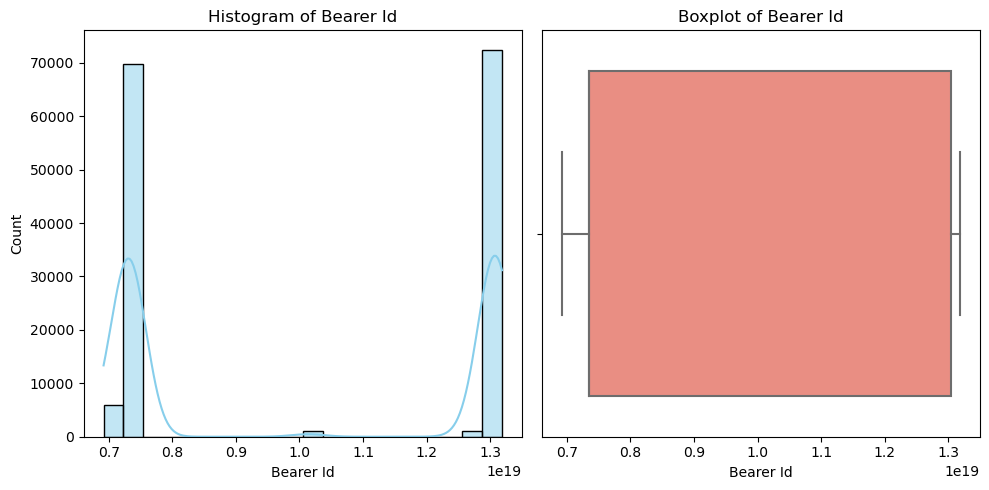

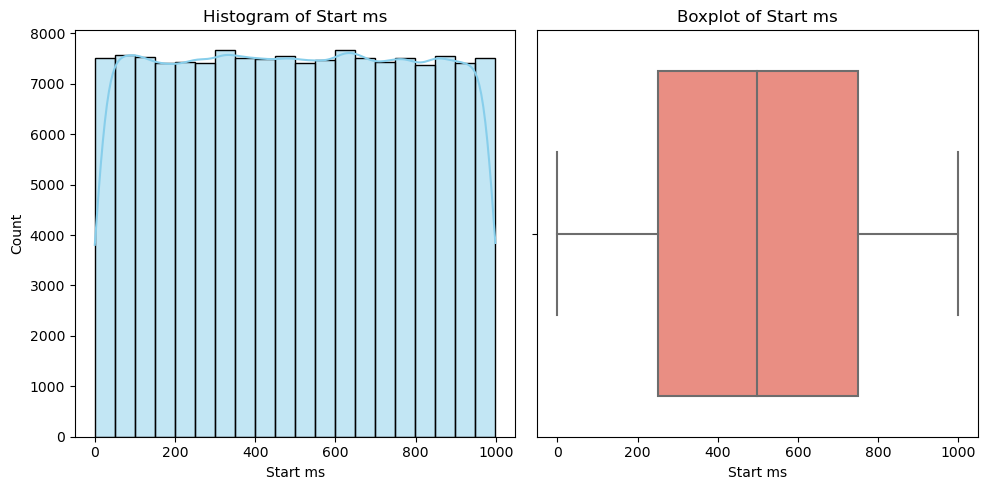

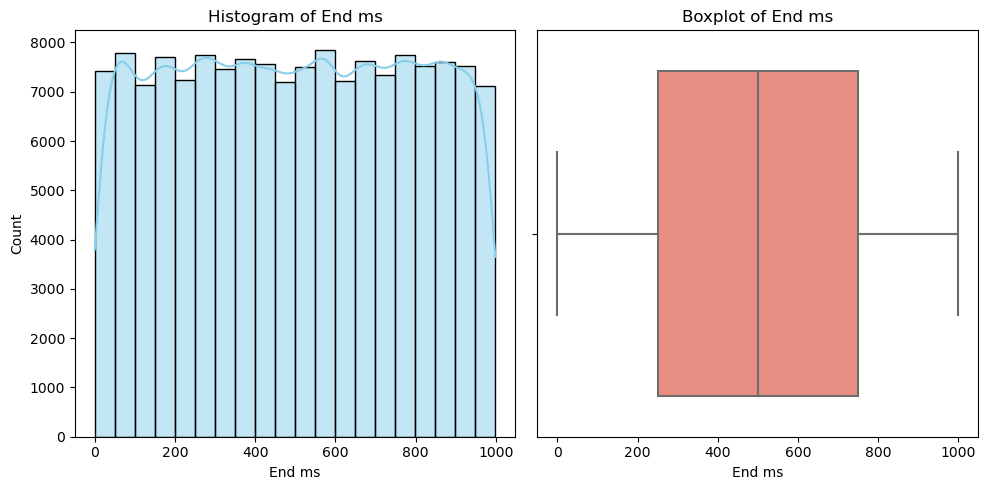

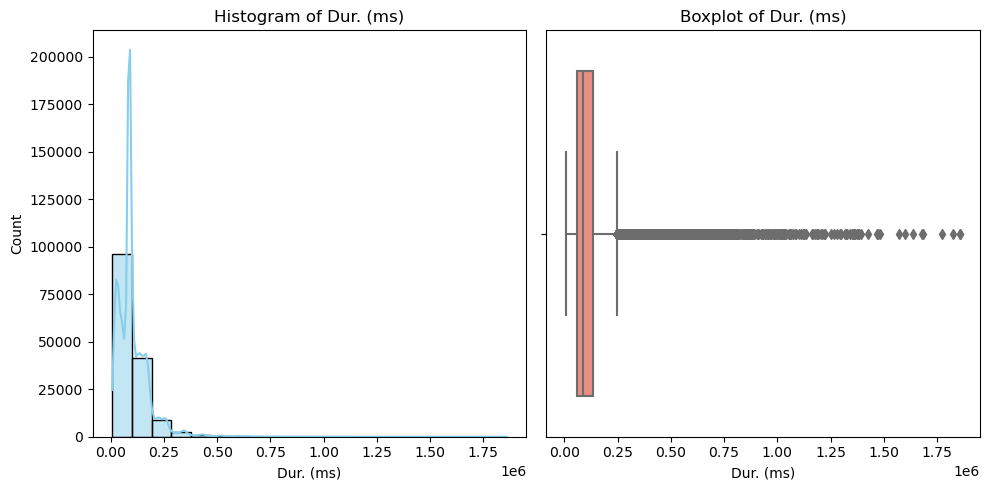

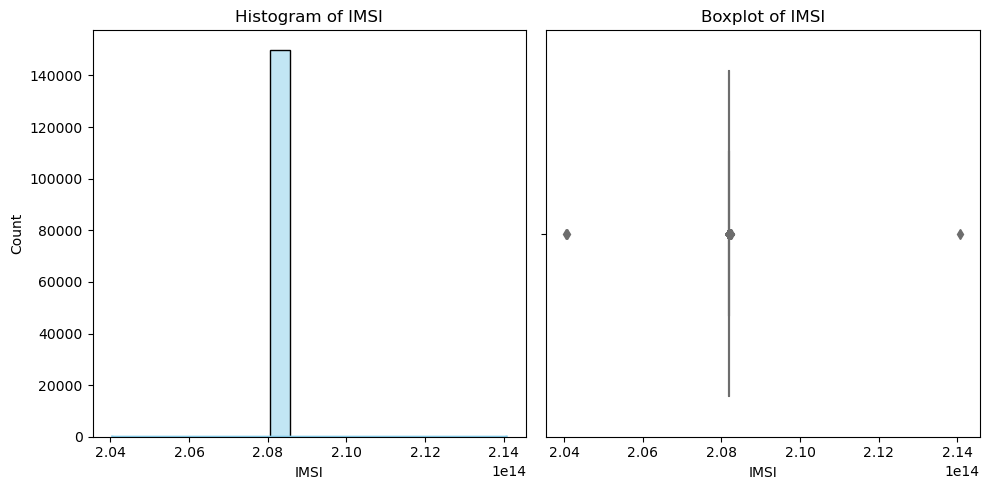

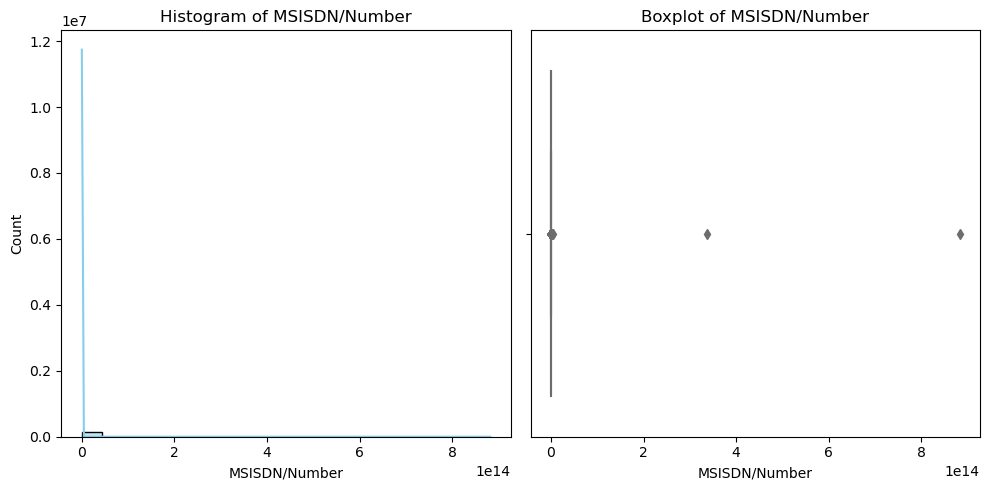

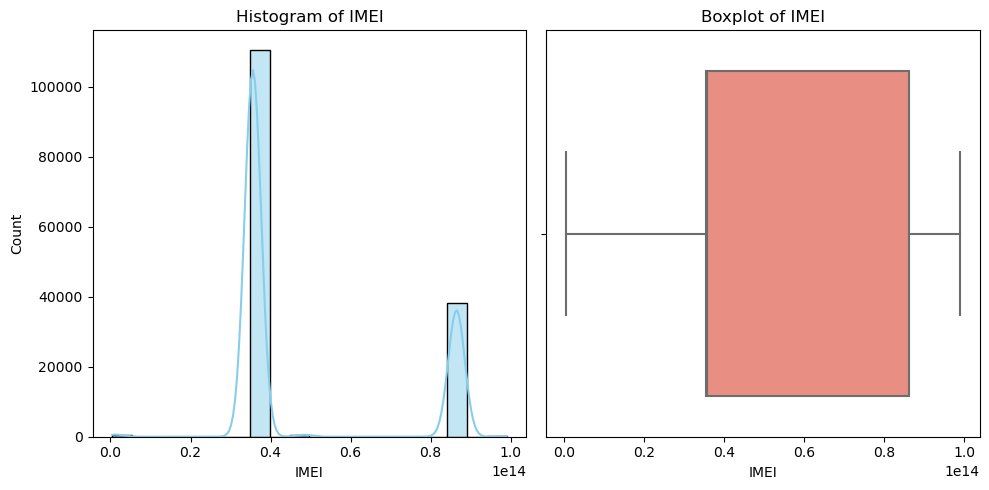

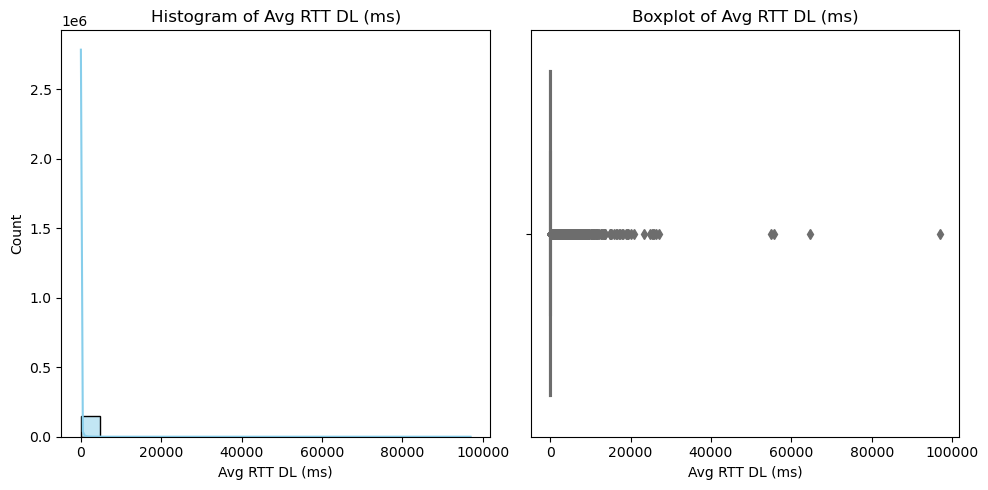

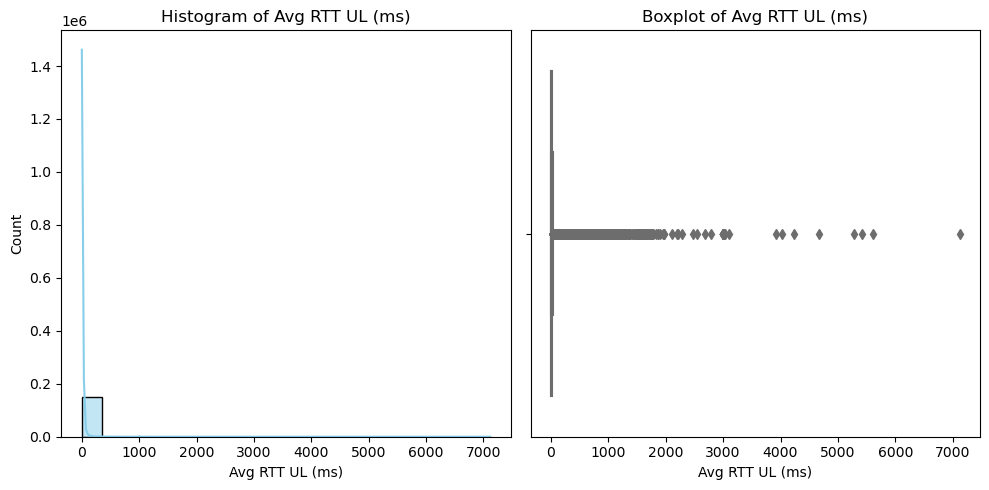

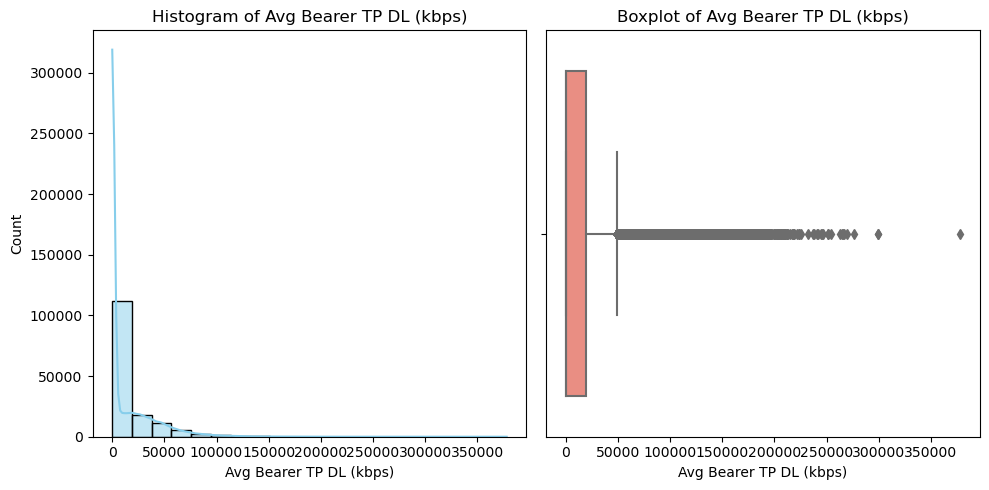

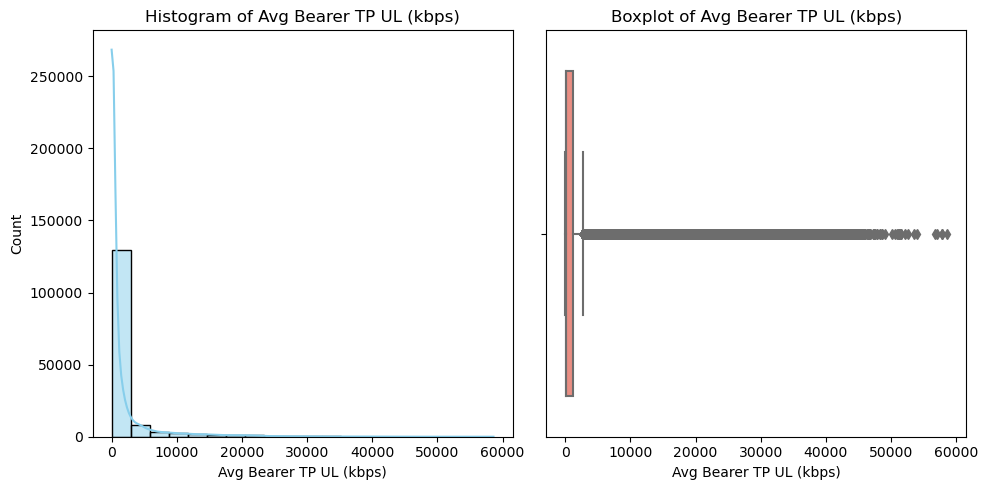

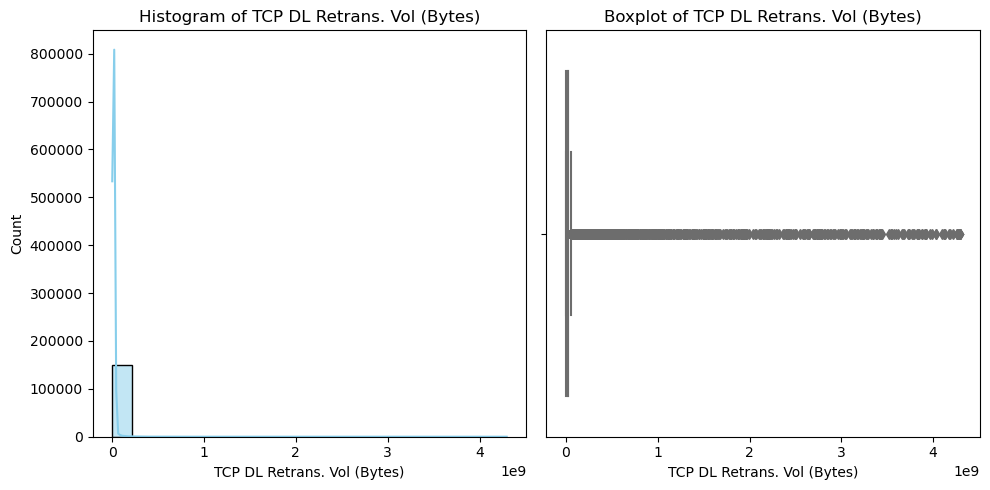

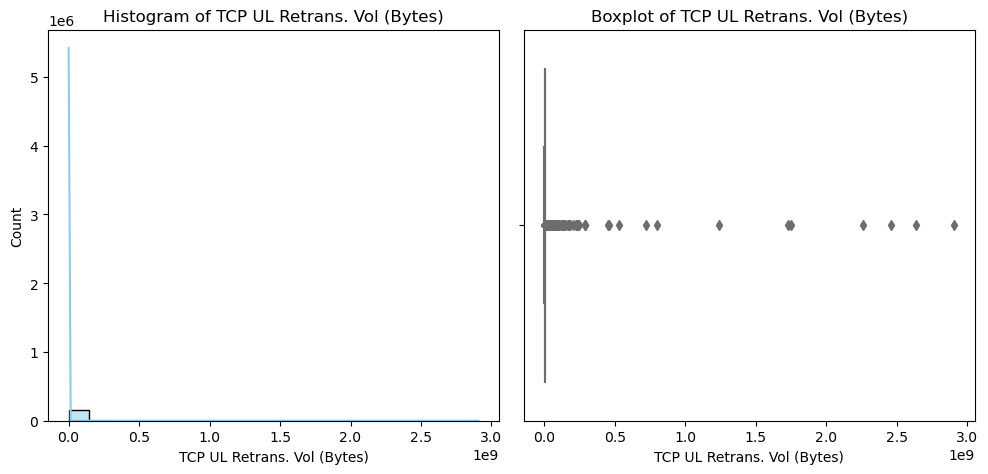

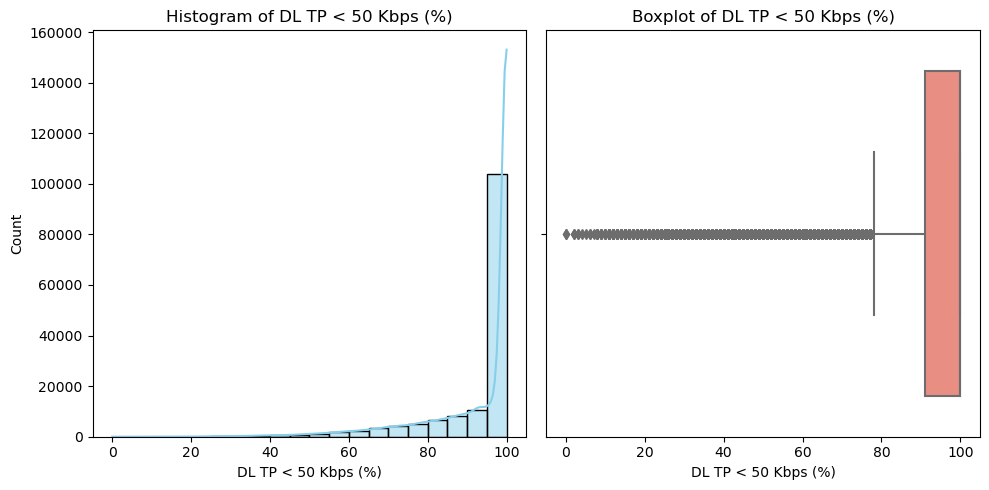

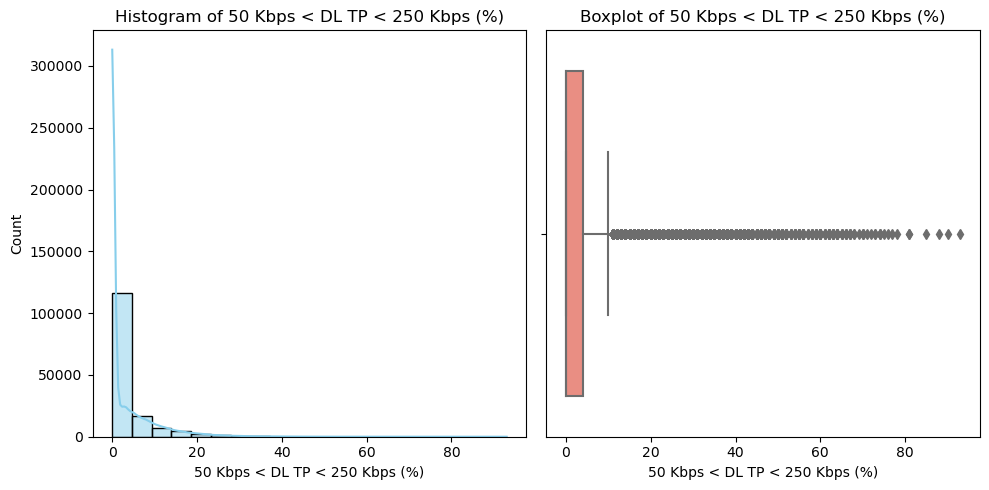

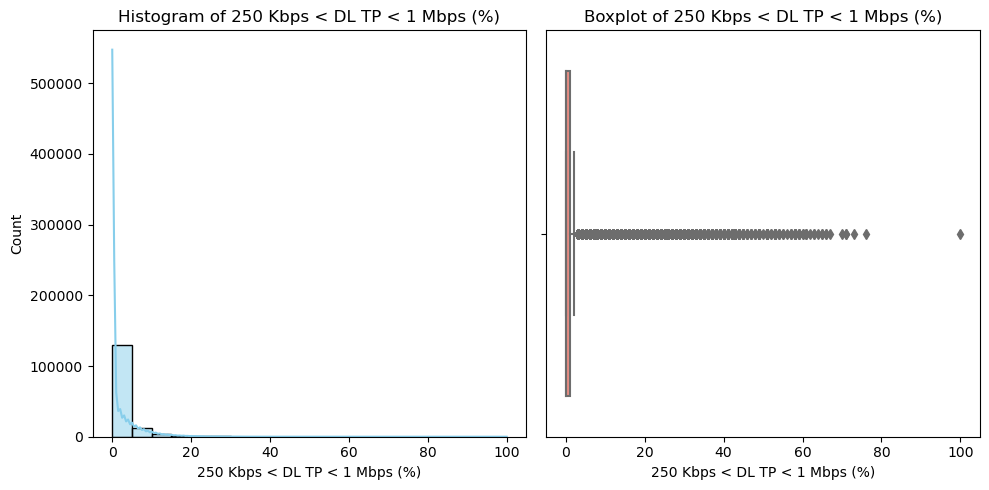

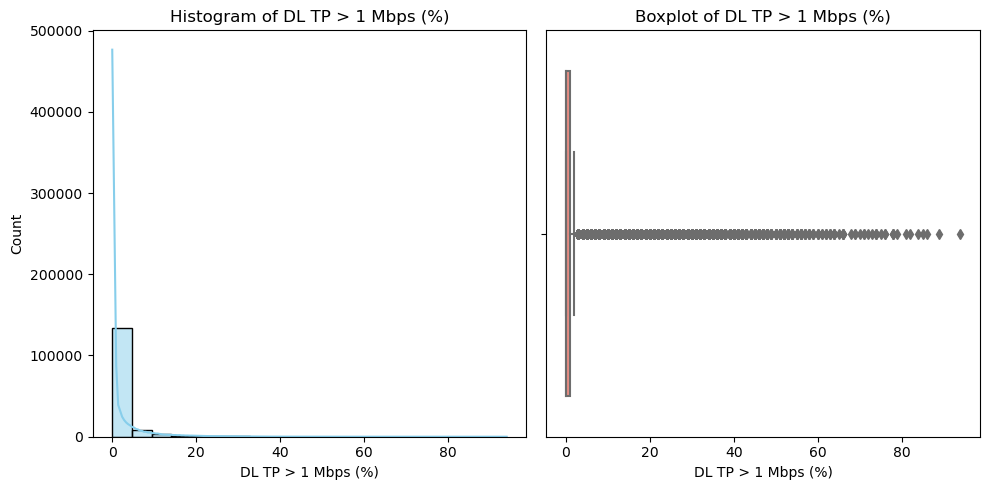

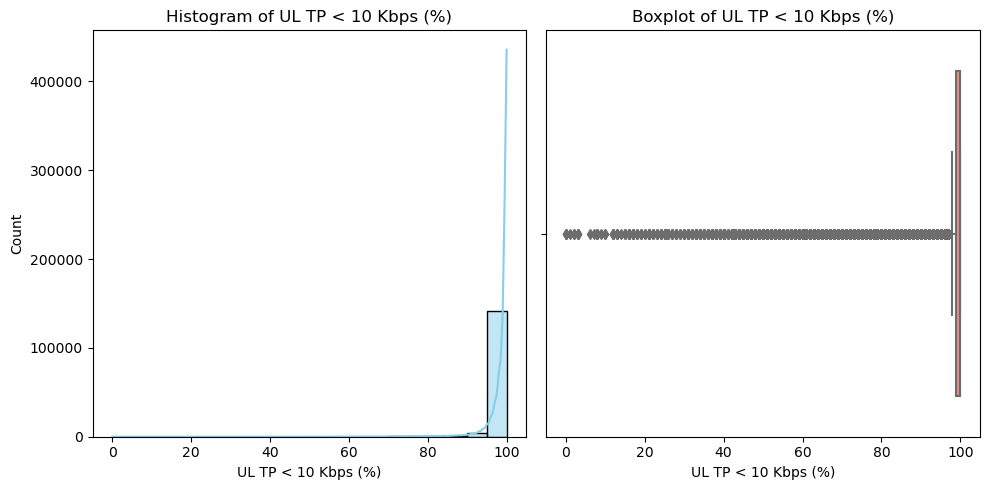

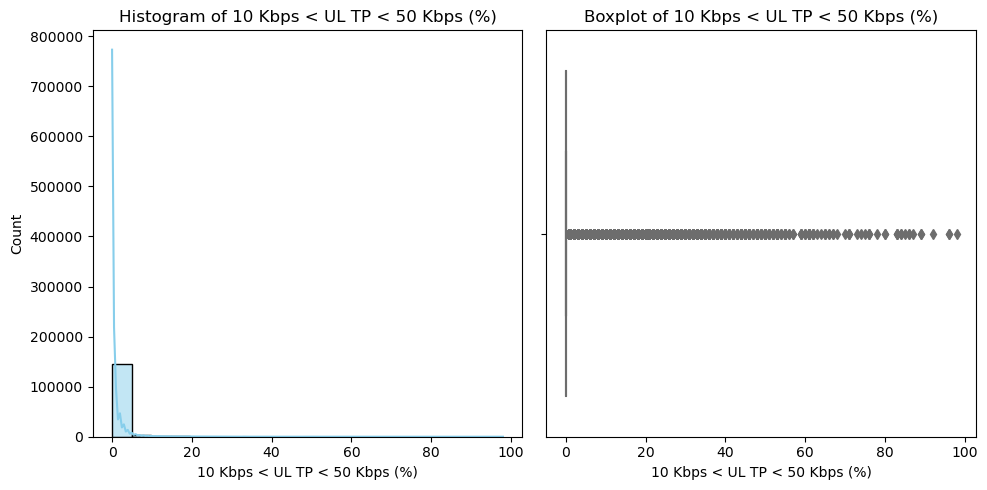

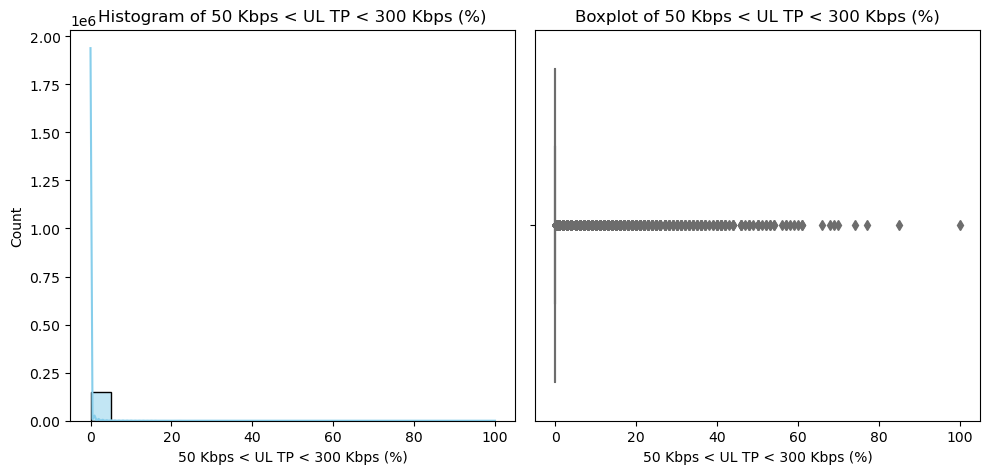

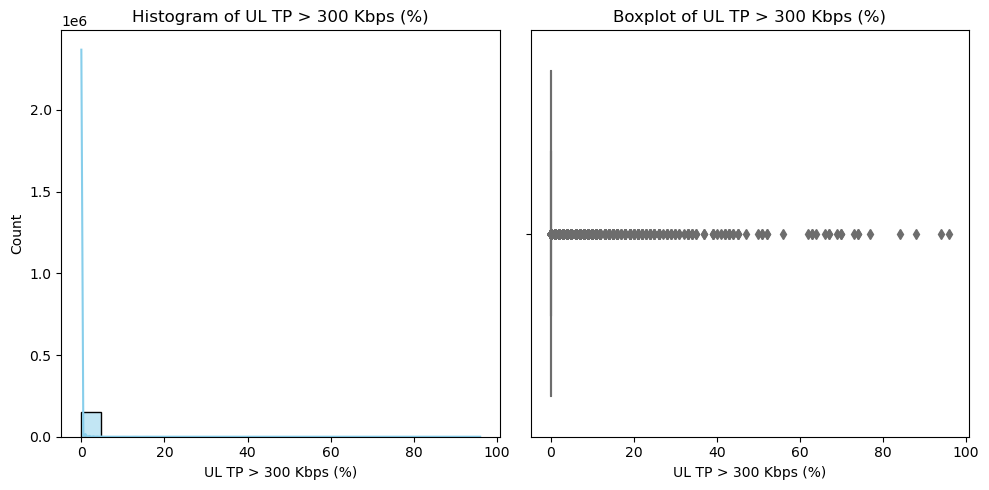

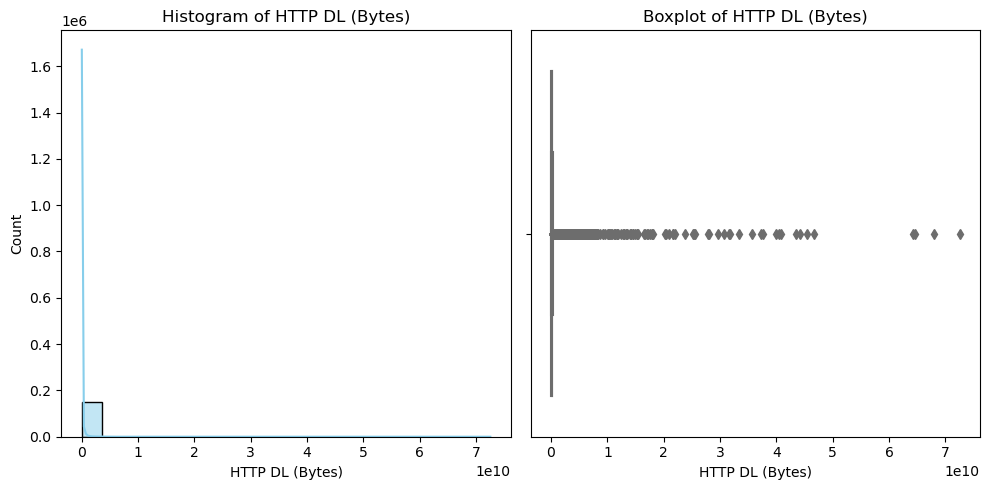

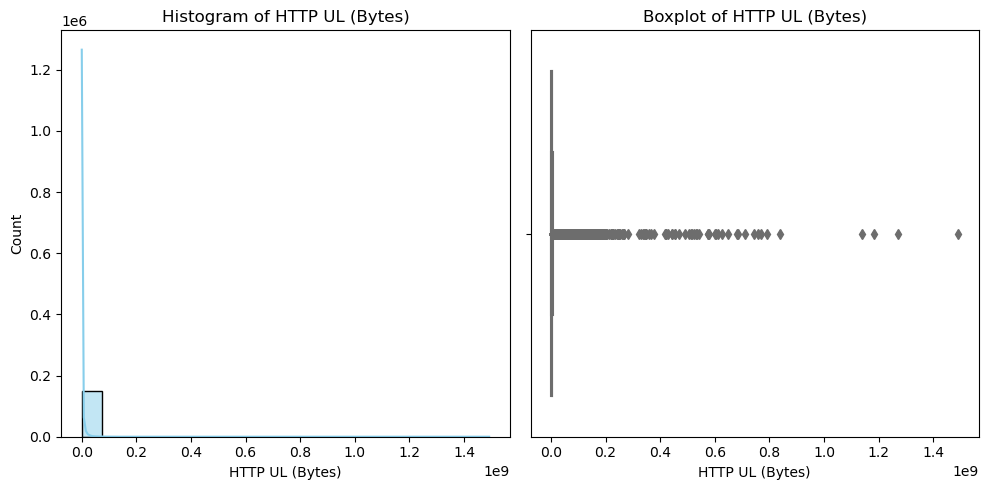

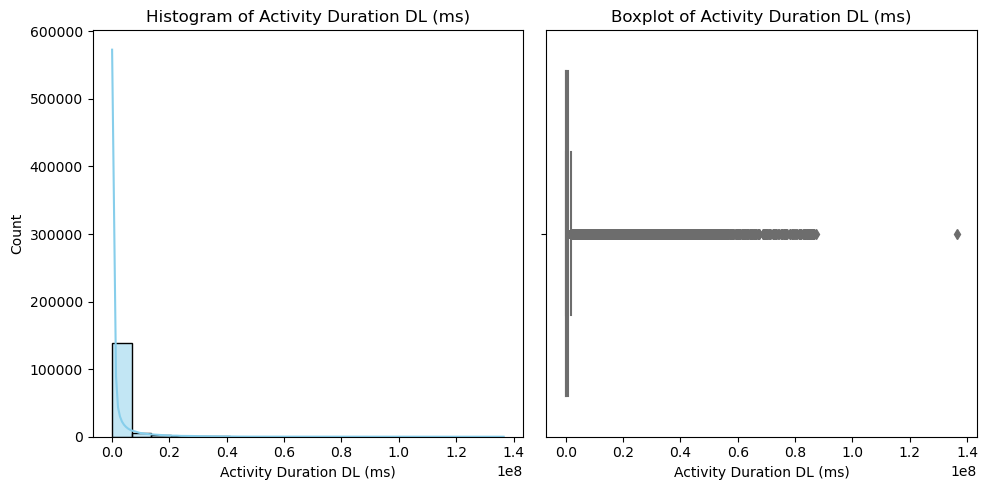

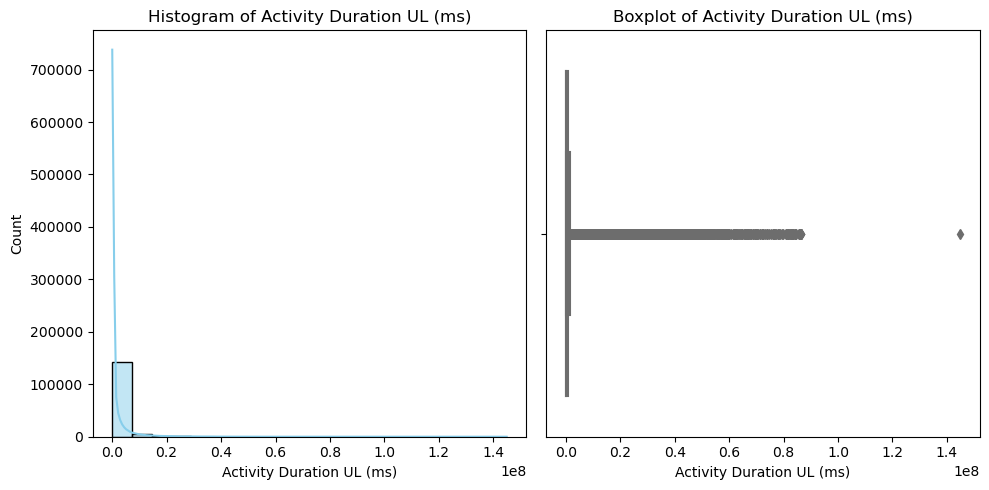

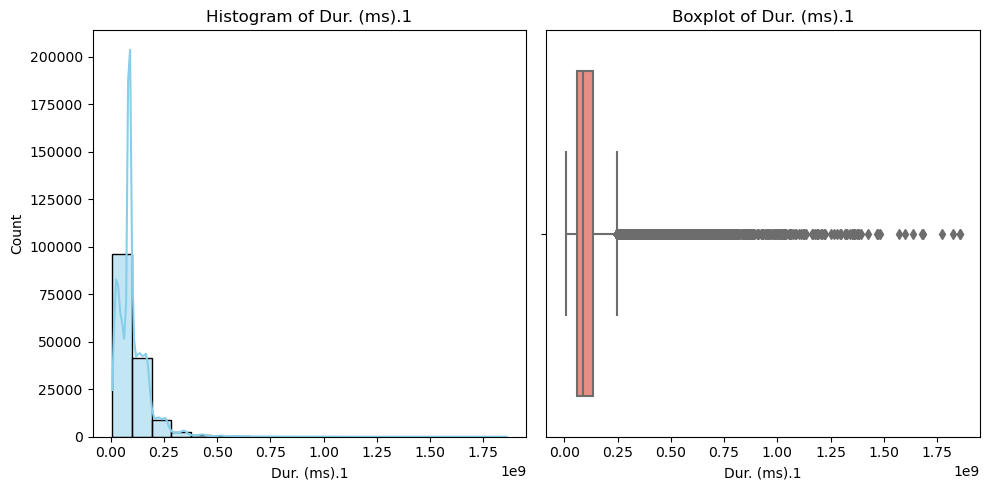

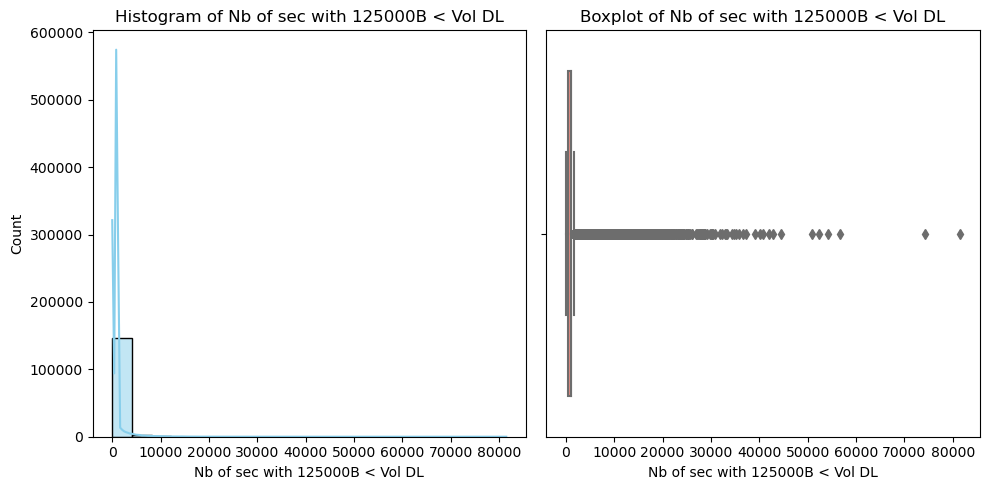

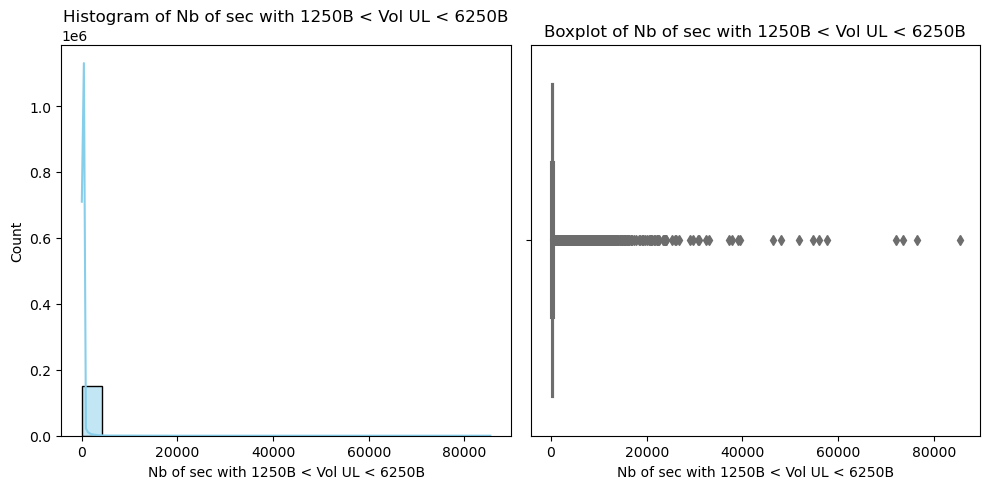

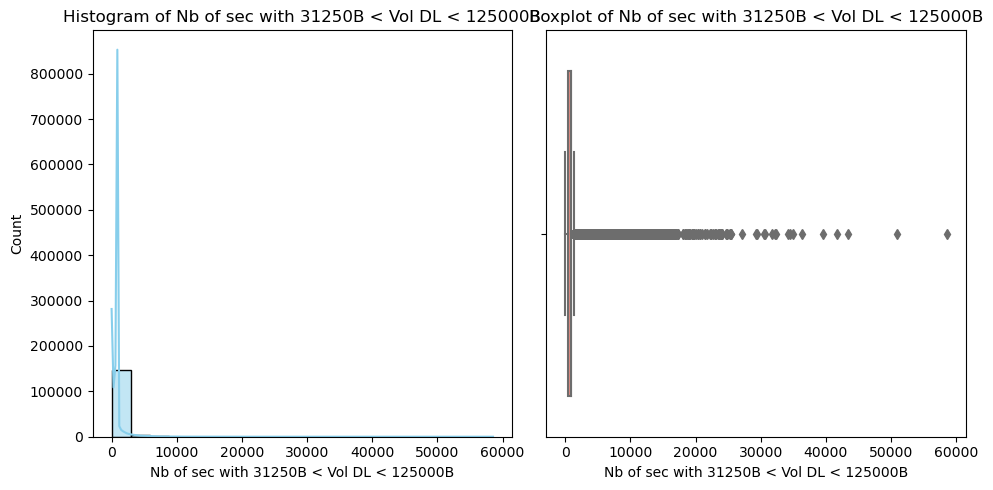

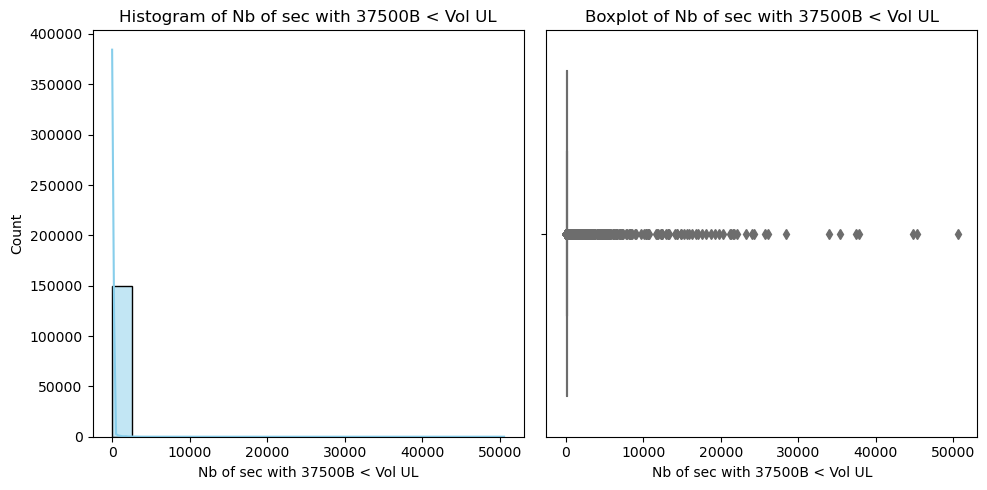

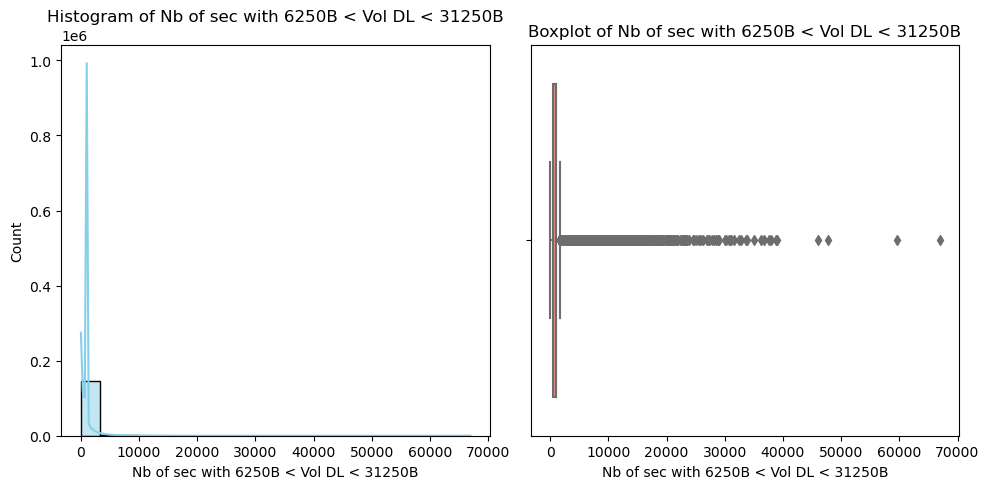

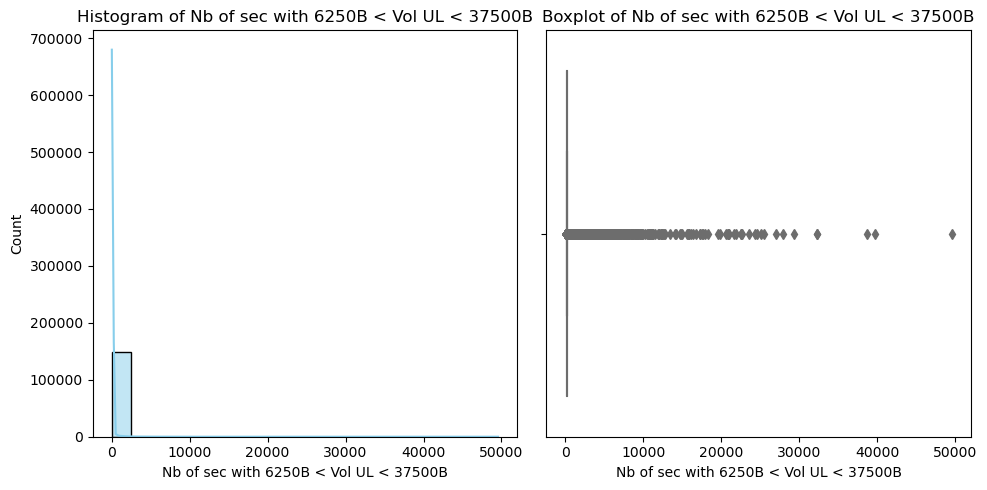

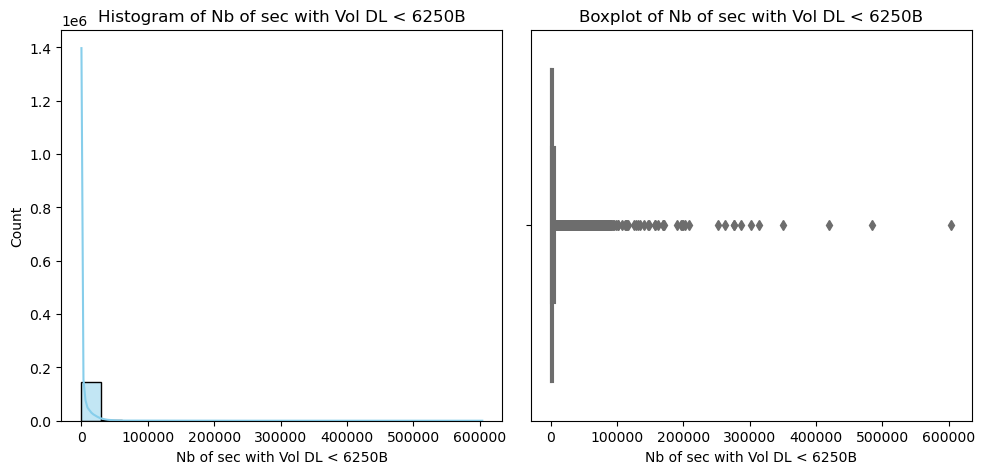

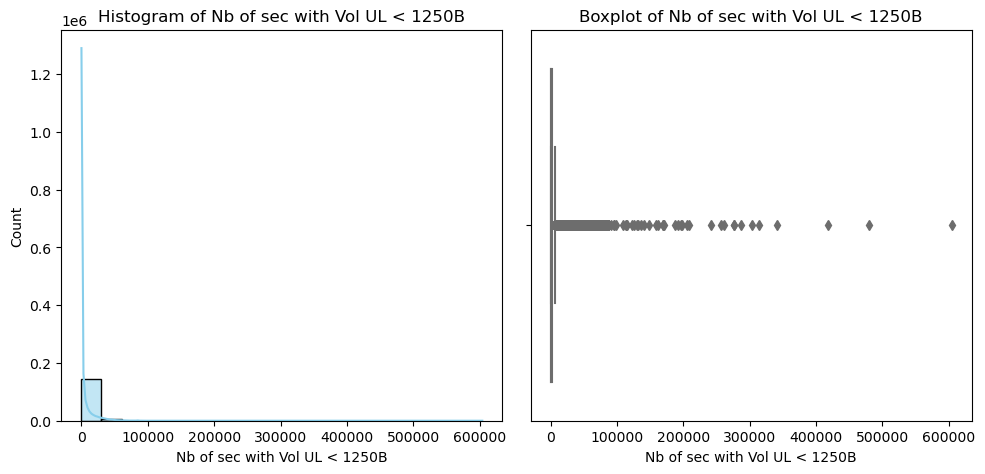

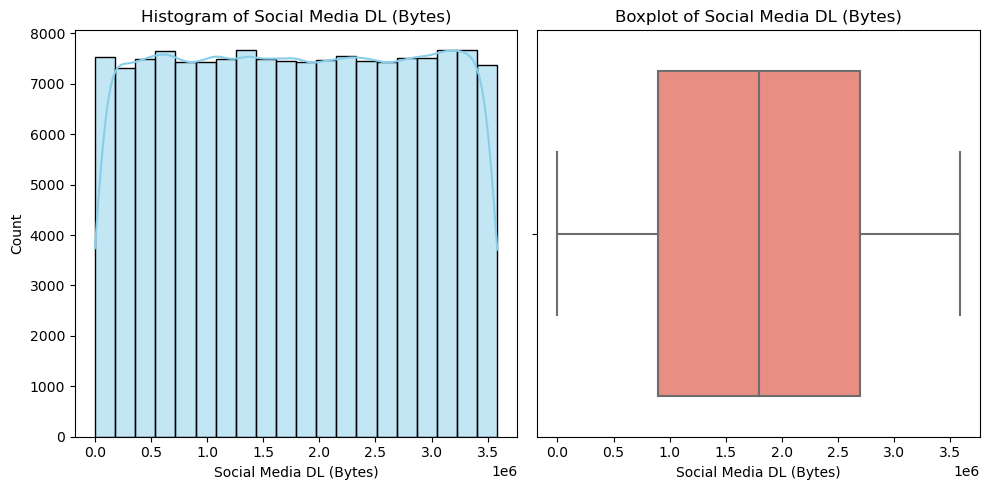

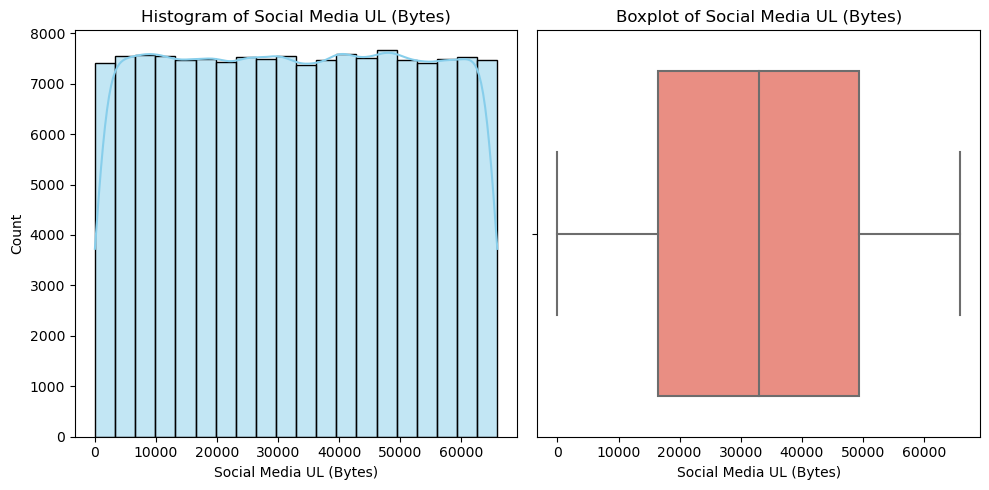

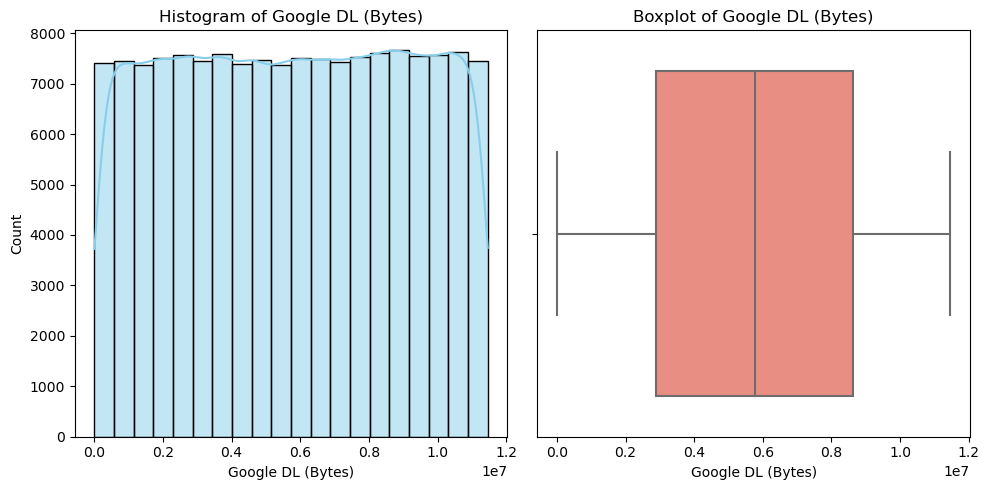

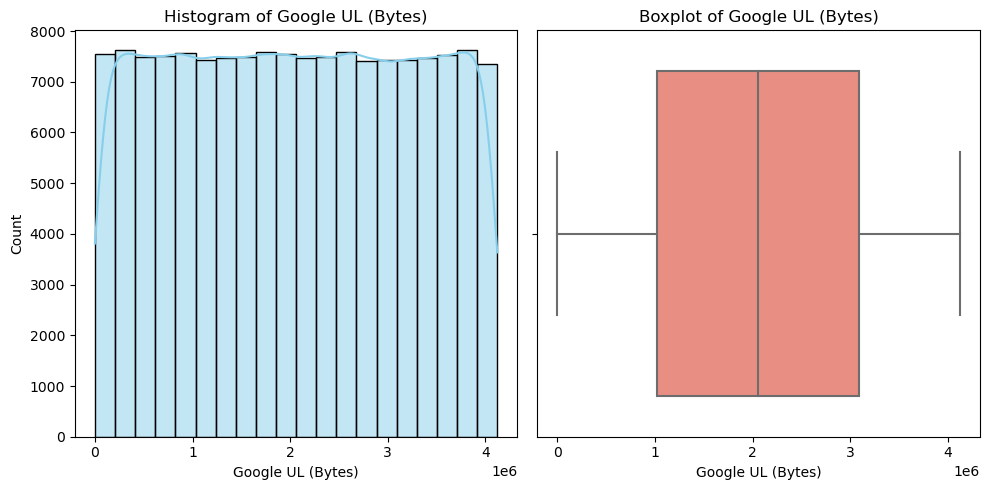

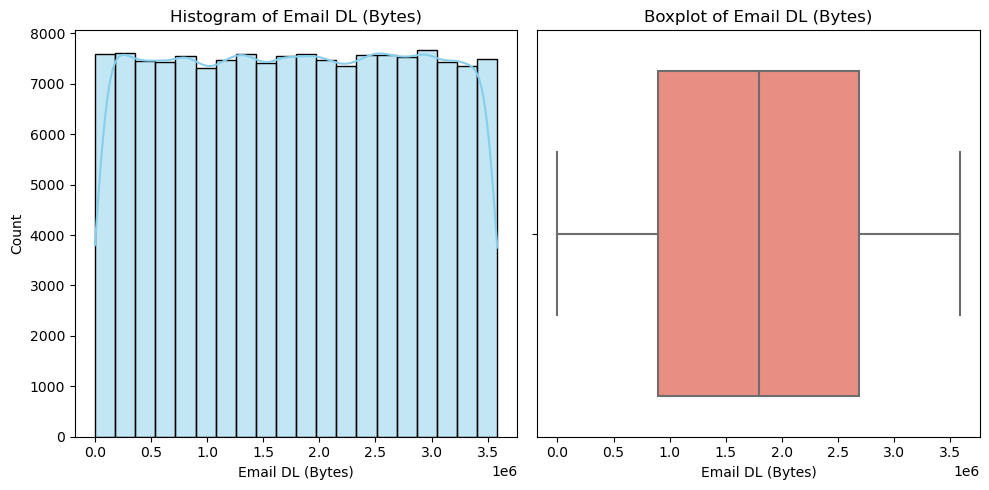

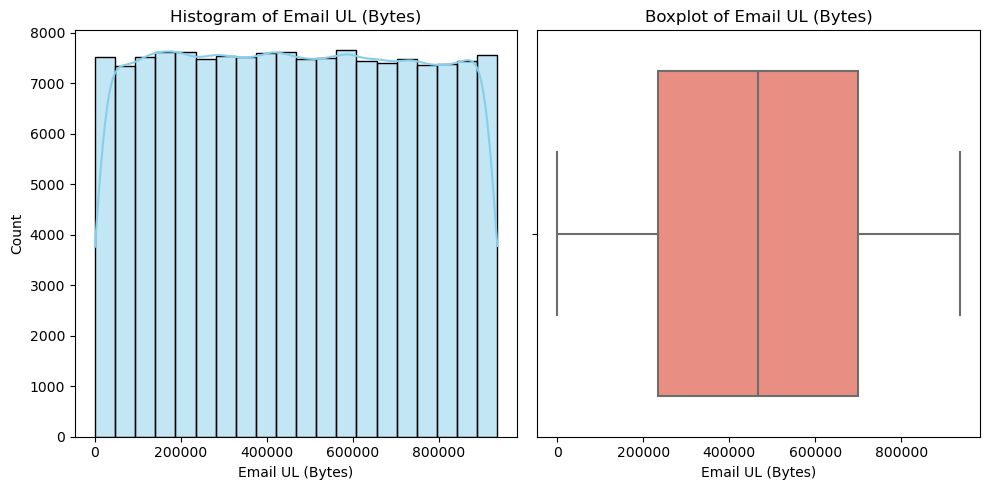

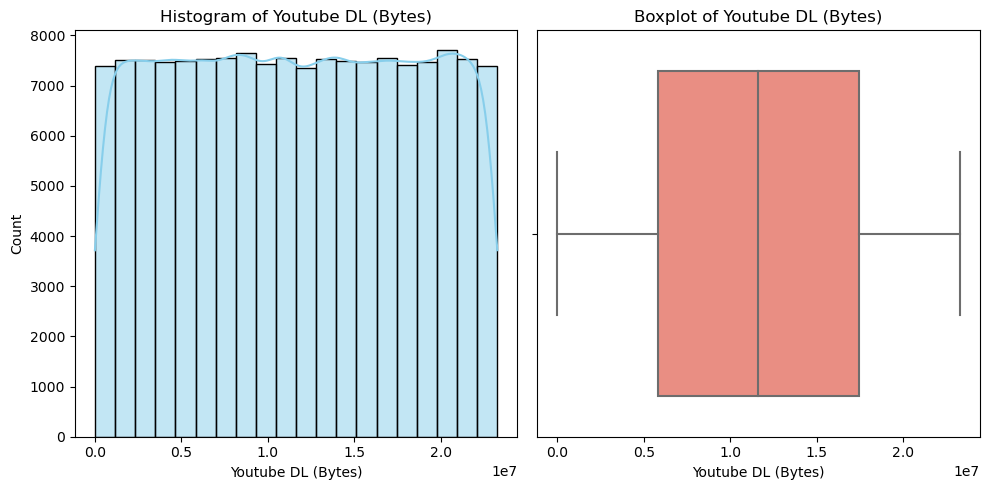

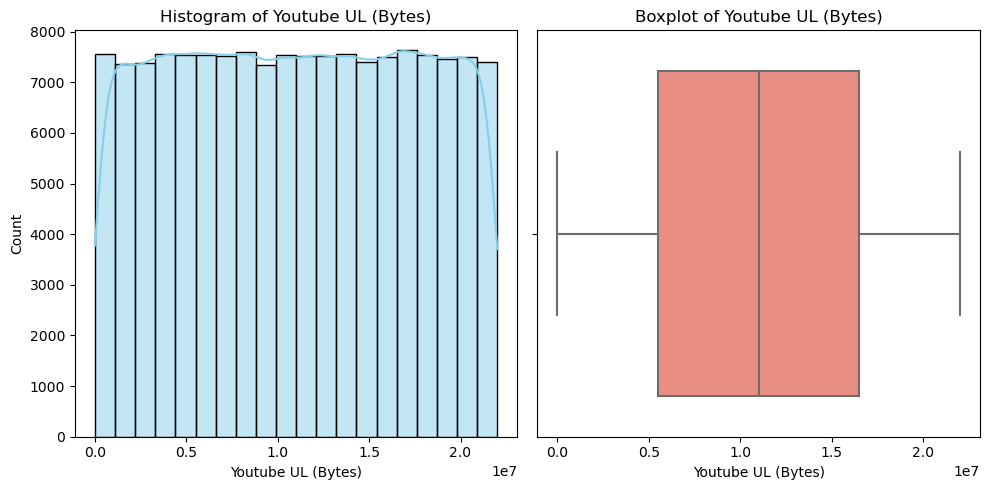

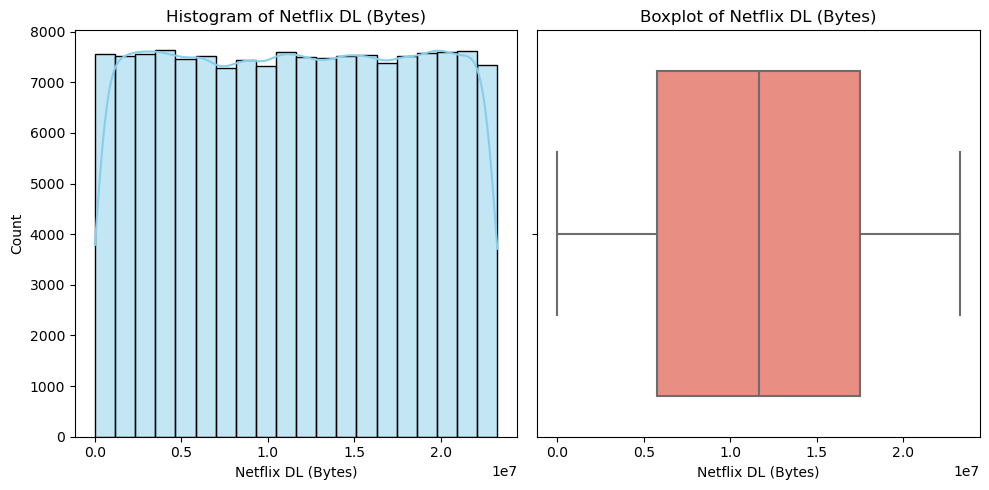

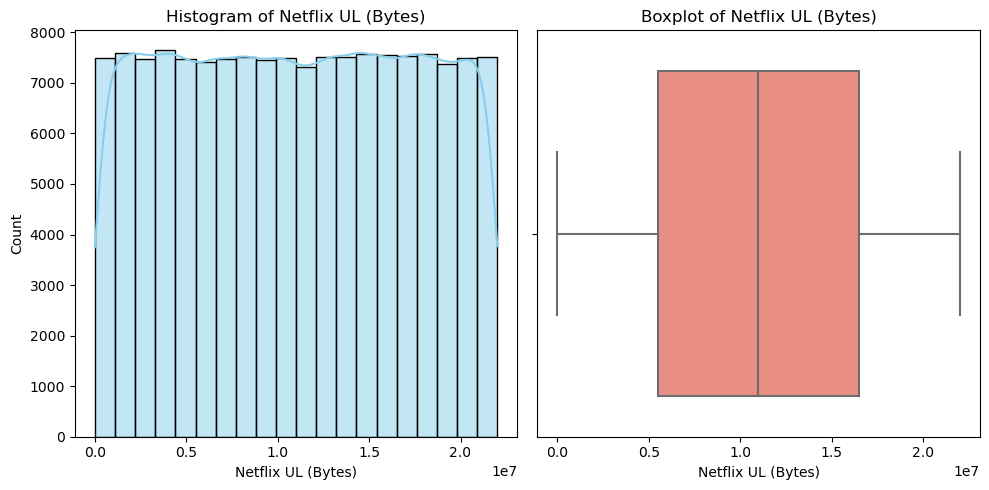

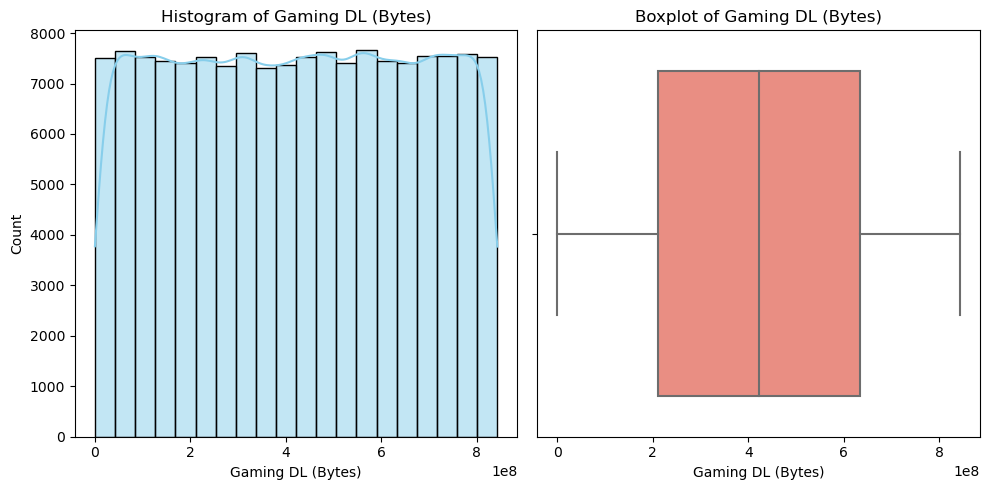

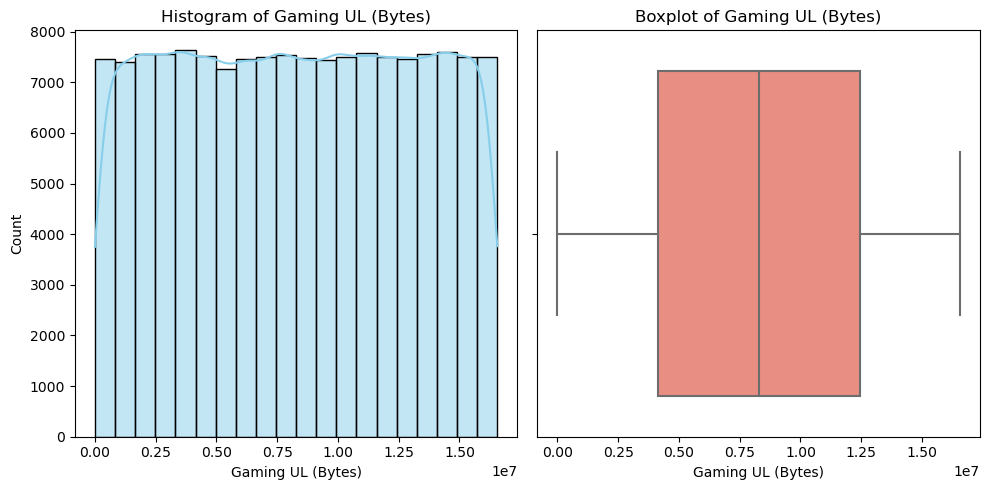

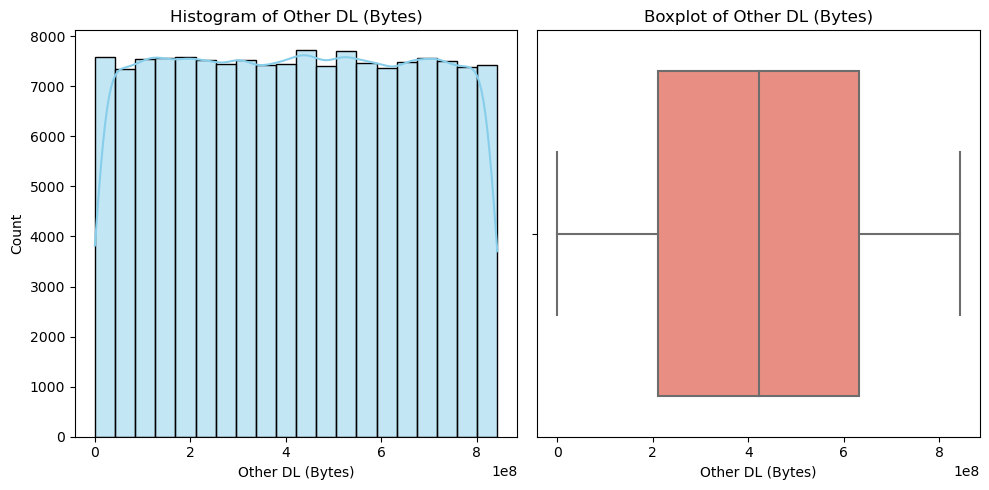

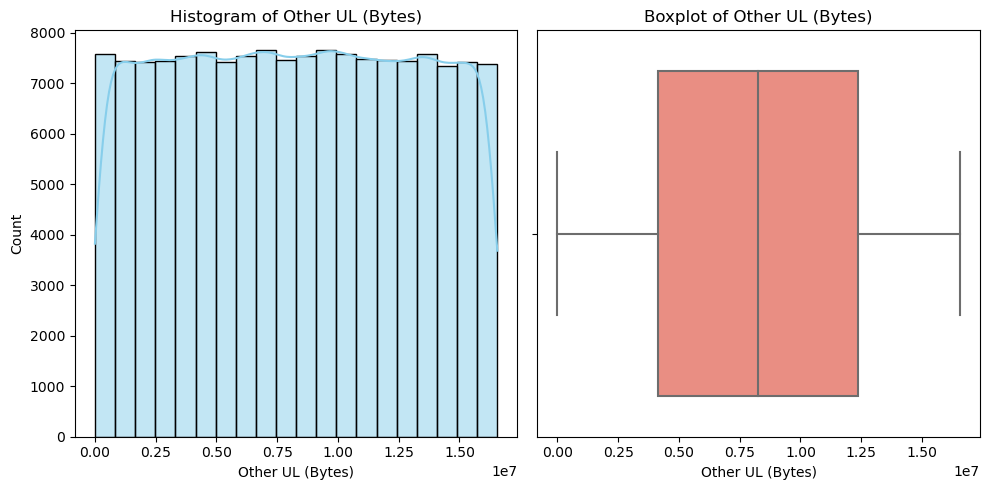

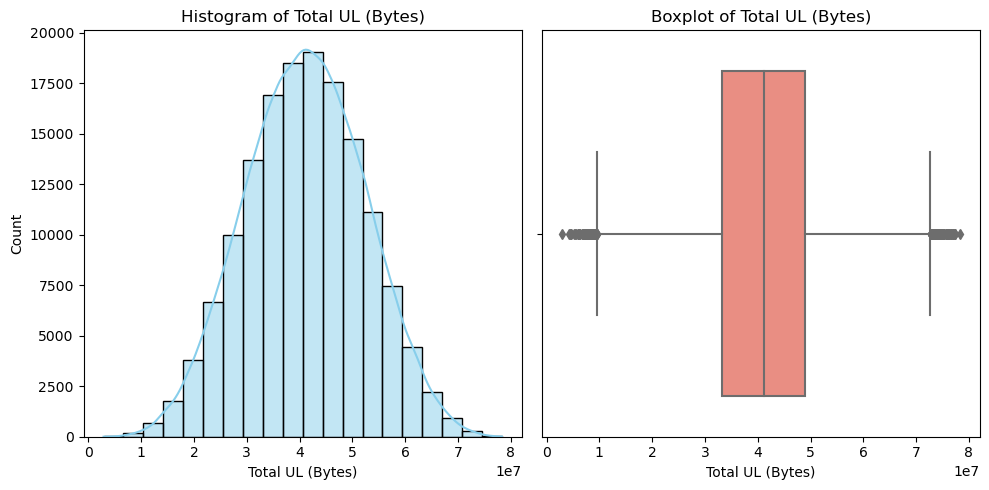

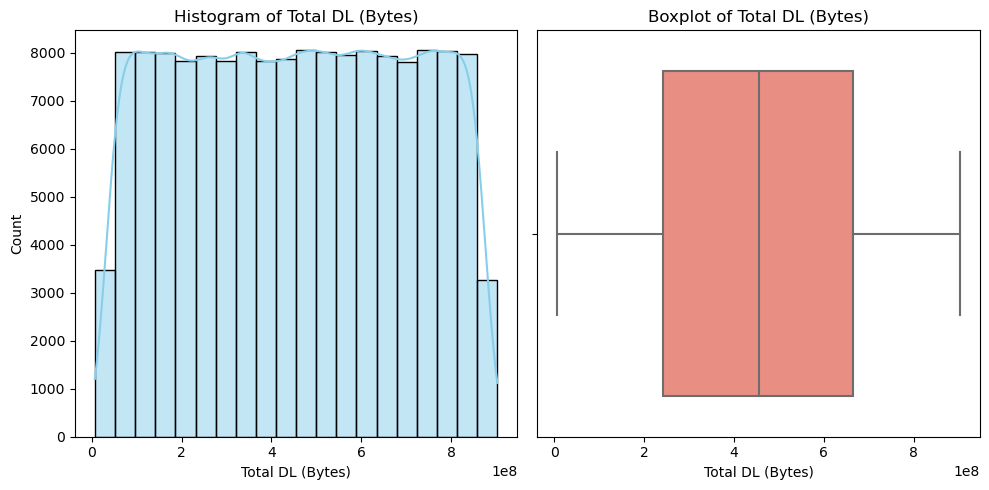

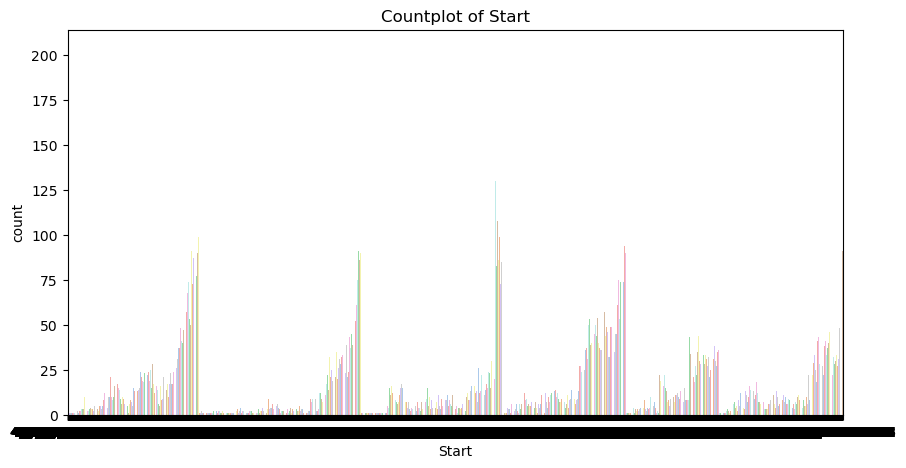

In [ ]:
# Identify variable types
quantitative_variables = telcom_data.select_dtypes(include=['int64', 'float64']).columns
categorical_variables = telcom_data.select_dtypes(include=['object']).columns

# Graphical Univariate Analysis for Quantitative Variables
for variable in quantitative_variables:
    plt.figure(figsize=(10, 5))

    # Histogram with Kernel Density Estimate (KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(telcom_data[variable], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=telcom_data[variable], color='salmon')
    plt.title(f'Boxplot of {variable}')

    plt.tight_layout()
    plt.show()

# Graphical Univariate Analysis for Categorical Variables
for variable in categorical_variables:
    plt.figure(figsize=(10, 5))

    # Countplot
    sns.countplot(x=telcom_data[variable], palette='pastel')
    plt.title(f'Countplot of {variable}')
    plt.show()

#### Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 

#### Social Media Bivariate Analysis

In [ ]:
# Relationship between Total DL+UL and social media DL


# Summing DL and UL for each application
telcom_data['Total DL+UL'] = telcom_data['Total UL (Bytes)'] + telcom_data['Total DL (Bytes)']


# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Social Media DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Social Media vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Social Media DL (Bytes)')
plt.show()


# Correlation matrix
# correlation_matrix = telcom_data[['Total DL+UL', 'Social Media DL (Bytes)']].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix')
# plt.show()

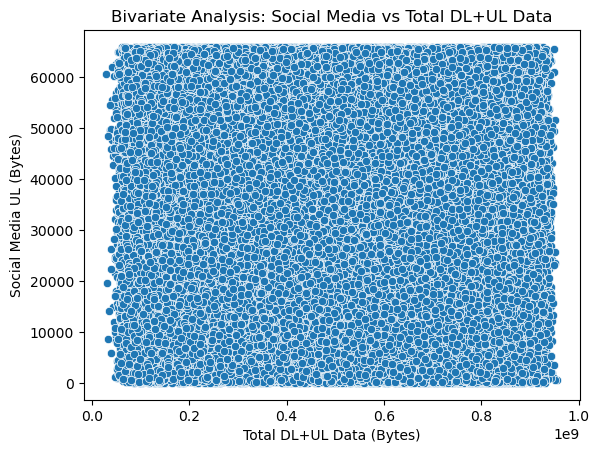

In [9]:
# Relationship between Total DL+UL and social media DL

# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Social Media UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Social Media vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Social Media UL (Bytes)')
plt.show()


#### google Bivariate Analysis

In [ ]:
# Relationship between Total DL+UL and 'Google DL (Bytes)'

# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Google DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Google DL vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Google DL (Bytes)' )
plt.show()


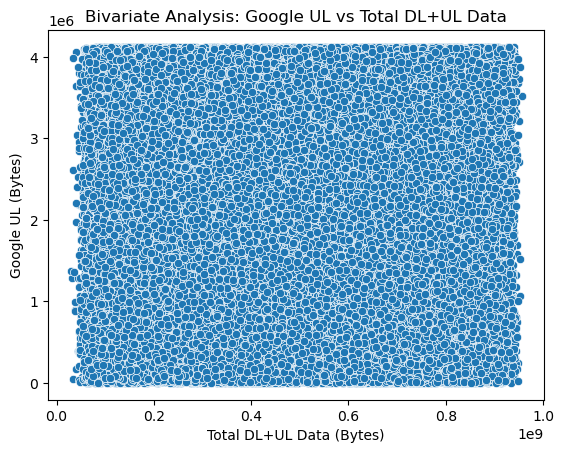

In [13]:
# Relationship between Total DL+UL and 'Google UL (Bytes)'

# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Google UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Google UL vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Google UL (Bytes)' )
plt.show()


#### Email Bivariate Anlaysis

In [ ]:
# Relationship between Total DL+UL and 'Email DL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Email DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Email DL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Email DL (Bytes)' )
plt.show()


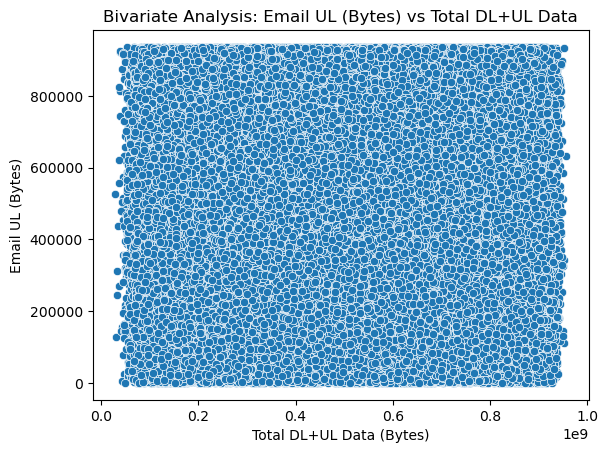

In [15]:
# Relationship between Total DL+UL and 'Email UL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Email UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Email UL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Email UL (Bytes)' )
plt.show()


#### YouTube Bivariate Analysis

In [ ]:
# Relationship between Total DL+UL and 'Youtube DL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Youtube DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Youtube DL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Youtube DL (Bytes)' )
plt.show()


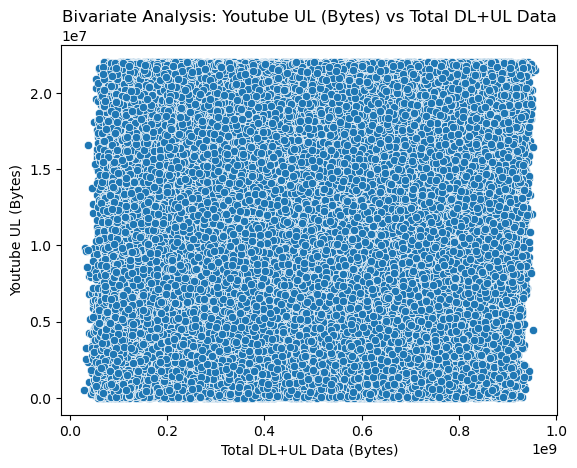

In [17]:
# Relationship between Total DL+UL and 'Youtube UL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Youtube UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Youtube UL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Youtube UL (Bytes)' )
plt.show()


#### Netflix Bivariate Analysis

In [ ]:
# Relationship between Total DL+UL and 'Netflix DL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Netflix DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Netflix DL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Netflix DL (Bytes)' )
plt.show()


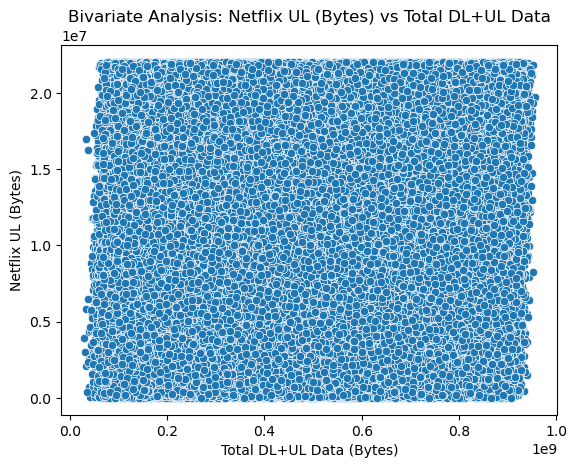

In [19]:
# Relationship between Total DL+UL and 'Netflix UL (Bytes)'
# Scatter plot
sns.scatterplot(x='Total DL+UL', y='Netflix UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis: Netflix UL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Netflix UL (Bytes)' )
plt.show()


#### Gaming Bivariate Analysis

In [ ]:
# Relationship between Total DL+UL and 'Gaming DL (Bytes)'
sns.scatterplot(x='Total DL+UL', y='Gaming DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis:Gaming DL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Gaming DL (Bytes)' )
plt.show()



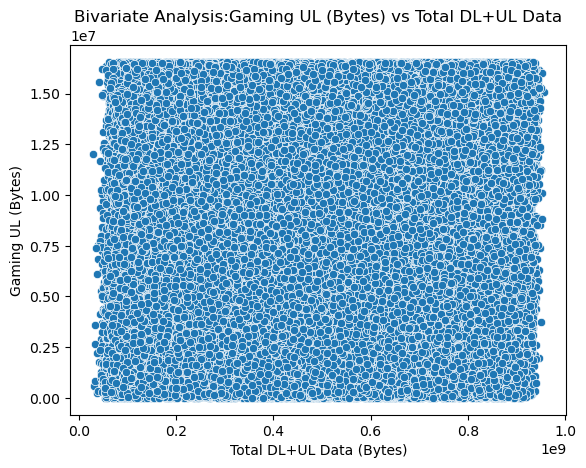

In [21]:
#  Relationship between Total DL+UL and 'Gaming UL (Bytes)'

sns.scatterplot(x='Total DL+UL', y='Gaming UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis:Gaming UL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Gaming UL (Bytes)' )
plt.show()



#### Other Bivariate Analysis

In [ ]:
#  Relationship between Total DL+UL and Other DL (Bytes)

sns.scatterplot(x='Total DL+UL', y='Other DL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis:Other DL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Other DL (Bytes)')
plt.show()


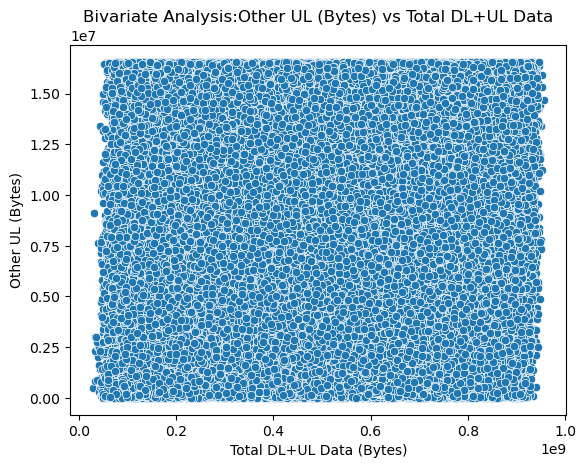

In [23]:
#  Relationship between Total DL+UL and Other UL (Bytes)

sns.scatterplot(x='Total DL+UL', y='Other UL (Bytes)', data=telcom_data)
plt.title('Bivariate Analysis:Other UL (Bytes) vs Total DL+UL Data')
plt.xlabel('Total DL+UL Data (Bytes)')
plt.ylabel('Other UL (Bytes)')
plt.show()


#### Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 


In [ ]:
# Calculate total data (DL+UL)
telcom_data['Total Data (DL+UL)'] = telcom_data['Total UL (Bytes)'] + telcom_data['Total DL (Bytes)']

# Calculate deciles based on total duration
telcom_data['Decile'] = pd.qcut(telcom_data['Dur. (ms)'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], labels=False, precision=0,duplicates='drop')

# Group by decile and sum total data
total_data_per_decile = telcom_data.groupby('Decile')['Total Data (DL+UL)'].sum().reset_index()

# Display the result
print(total_data_per_decile)

#### Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, and Other data 


In [4]:
# Compute Correlation matrix

correlation_matrix = telcom_data[['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)']].corr()

# Convert correlation matrix to DataFrame
correlation_df = pd.DataFrame(correlation_matrix.stack(), columns=['Correlation']).reset_index()

# Display the correlation matrix
print(correlation_df)

                     level_0                  level_1  Correlation
0    Social Media DL (Bytes)  Social Media DL (Bytes)     1.000000
1    Social Media DL (Bytes)  Social Media UL (Bytes)    -0.000555
2    Social Media DL (Bytes)        Google DL (Bytes)    -0.001954
3    Social Media DL (Bytes)        Google UL (Bytes)     0.000186
4    Social Media DL (Bytes)         Email DL (Bytes)     0.004745
5    Social Media DL (Bytes)         Email UL (Bytes)    -0.002518
6    Social Media DL (Bytes)       Youtube DL (Bytes)    -0.001389
7    Social Media DL (Bytes)       Youtube UL (Bytes)     0.002345
8    Social Media DL (Bytes)       Netflix DL (Bytes)    -0.001817
9    Social Media DL (Bytes)       Netflix UL (Bytes)     0.003457
10   Social Media DL (Bytes)        Gaming DL (Bytes)     0.001018
11   Social Media DL (Bytes)        Gaming UL (Bytes)     0.003095
12   Social Media DL (Bytes)         Other DL (Bytes)     0.006126
13   Social Media DL (Bytes)         Other UL (Bytes)     0.00

The values in the correlation matrix range from -1 to 1, where:

1. 1 indicates a perfect positive correlation.
2. -1 indicates a perfect negative correlation.
3. 0 indicates no correlation.


Interpret the findings based on the correlation values. For example, a high positive correlation between two variables suggests that they tend to increase or decrease together, while a high negative correlation suggests that as one variable increases, the other tends to decrease.

#### Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum).

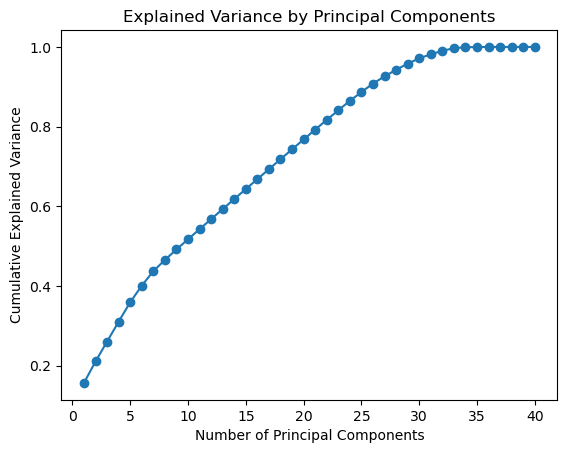

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop non-numeric columns (assuming these are not relevant for PCA)
telcom_data_numeric = telcom_data.select_dtypes(include=['number'])


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(telcom_data_numeric)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

Explained Variance: The plot shows the cumulative explained variance by the principal components. Look for the elbow point where adding more components provides diminishing returns. This helps in choosing an optimal number of dimensions.

Principal Components: Examine the loadings of the principal components. High loadings indicate which original features contribute the most to each principal component. Interpretation of these loadings can provide insights into the underlying patterns in the data.

Reduced Dimension Data: Once you decide on the number of components, you can use them to transform your original data into a reduced-dimensional space. This new representation can be used for further analysis or visualization.

Interpretation of Components: Interpret the principal components in terms of the original features. For example, if the first principal component has high loadings on features related to call duration and data usage, it may represent a measure of overall communication activity.